<a href="https://colab.research.google.com/github/Muhammad-Taufiq-Khan/ML-Kidney-Disease-Diagnosis/blob/main/Kidney%20Disease%20Diagnosis%20(24%20feature).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 0: Setup dependencies

## 0.1 Install Dependencies

In [3]:
# ! pip install -U pandas-profiling

## 0.2 Import Dependencies

In [4]:
import time
notebook_strtime = time.time()

import numpy as np
from numpy import mean
from numpy import std

import pandas as pd
pd.set_option('display.max_columns', None)
from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.style as style
style.use('seaborn-darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.impute import KNNImputer #import Knn Imputer
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline


#Importing Classification Models
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from joblib import dump, load

import warnings
warnings.filterwarnings(action='ignore')

## 0.3 Fetch Dataset

In [5]:
#Fetch Data from my GitHub Repo
url = "https://raw.githubusercontent.com/Muhammad-Taufiq-Khan/ML-Kidney-Disease-Diagnosis/main/kidney_disease.csv"
dataframe = pd.read_csv(url)
dataframe.sample(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
290,290,54.0,70.0,1.020,0.0,0.0,NaN,NaN,NaN,NaN,76.0,28.0,0.6,146.0,3.5,14.8,52,8400,5.9,no,no,no,good,no,no,notckd
324,324,40.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,119.0,15.0,0.7,150.0,4.9,NaN,NaN,NaN,NaN,no,no,no,good,no,no,notckd
173,173,17.0,70.0,1.015,1.0,0.0,abnormal,normal,notpresent,notpresent,22.0,1.5,7.3,145.0,2.8,13.1,41,11200,NaN,no,no,no,good,no,no,ckd
158,158,71.0,60.0,1.020,3.0,2.0,normal,normal,present,notpresent,424.0,48.0,1.5,132.0,4.0,10.9,31,NaN,NaN,yes,yes,yes,good,no,no,ckd
367,367,68.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,125.0,41.0,1.1,139.0,3.8,17.4,50,6700,6.1,no,no,no,good,no,no,notckd
333,333,23.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,99.0,46.0,1.2,142.0,4.0,17.7,46,4300,5.5,no,no,no,good,no,no,notckd
30,30,NaN,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,93.0,155.0,7.3,132.0,4.9,NaN,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
387,387,15.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,93.0,17.0,0.9,136.0,3.9,16.7,50,6200,5.2,no,no,no,good,no,no,notckd
153,153,55.0,90.0,1.010,2.0,1.0,abnormal,abnormal,notpresent,notpresent,273.0,235.0,14.2,132.0,3.4,8.3,22,14600,2.9,yes,yes,no,poor,yes,yes,ckd
181,181,45.0,70.0,1.025,2.0,0.0,normal,abnormal,present,notpresent,117.0,52.0,2.2,136.0,3.8,10.0,30,19100,3.7,no,no,no,good,no,no,ckd


In [6]:
#Rename Each Column
dataframe.columns = ["id","age", "blood_pressure", "specific_gravety", "albumin","sugar" ,"red_blood_cells", "pus_cell", "pus_cell_clumps", "bacteria", "blood_glucose_random", "blood _urea", "serum_creatinine", "sodium", "potassium", "hemoglobine", "packed_cell_volume", "white_blood_cell_count", "red_blood_cell_count", "hypertension", "diabetes_mellitias", "coronary_artery_disease", "appetite", "pedal_edema", "anemia", "ckd" ]


In [7]:
def execution_duration(strtime):
    endtime = time.time()
    duration = endtime-strtime
    print(f"execution time: {round(duration,3)}s")

# Chapter 1: Exploratory Data Analysis

In [8]:
# profile = ProfileReport(dataframe, title="CKD Dataset EDA Report")
# profile.to_file("EDA_report.html")

# Chapter 2: Cleaning data

In [9]:
def clean_dataset(dataframe):
    strtime = time.time()
    #Fix typing mistakes
    # Col: 20
    dataframe["diabetes_mellitias"]= dataframe["diabetes_mellitias"].map({'yes':'yes','no':'no',' yes':'yes', '\tno':'no', '\tyes':'yes'})
    # Col 21
    dataframe["coronary_artery_disease"]= dataframe["coronary_artery_disease"].map({'yes':'yes','no':'no', '\tno':'no'})
    # col 25
    dataframe["ckd"]= dataframe["ckd"].map({'ckd':'ckd','ckd\t':'ckd', 'notckd':'notckd'})

    for i in range(dataframe.shape[0]):
        # packed_cell_volume
        if dataframe.iloc[i,16]=='\t?':
            dataframe.iloc[i,16]=np.nan
        if dataframe.iloc[i,16]=='\t43':
            dataframe.iloc[i,16]='43'
        # white_blood_cell_count
        if dataframe.iloc[i,17]=='\t?':
            dataframe.iloc[i,17]=np.nan
        if dataframe.iloc[i,17]=='\t6200':
            dataframe.iloc[i,17]= '6200'
        if dataframe.iloc[i,17]=='\t8400':
            dataframe.iloc[i,17]= '6200'
        # red_blood_cell_count
        if dataframe.iloc[i,18]=='\t?':
            dataframe.iloc[i,18]=np.nan

    # ##Show Unique values per Attribute
    # for i in (dataframe):
    #     print(f"Attribute Name: {i}   Total Unique Value: {dataframe[i].nunique()} \n Unique Values: {dataframe[i].unique()}\n")

    # #Drop ID column as it's not needed further
    # dataframe.drop('id',axis=1,inplace=True)


    # Some numerical features are mistyped as strings.
    mistyped=['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
    # Storing Neumerical data into numeric list
    numeric=[]
    for i in dataframe.columns:
        if dataframe[i].dtype=='float64':
            numeric.append(i)
    numeric=numeric+mistyped
    # Storing Categorical feature's into a list.
    categoricals=[]
    for col in dataframe.columns:
        if not col in numeric:
            categoricals.append(col)
    categoricals.remove('ckd')

    for col in mistyped:
            dataframe[col]=dataframe[col].astype('float')
    
    execution_duration(strtime)

    return dataframe


df = dataframe.copy()
clean_df = clean_dataset(df)
clean_df.info()

execution time: 0.07s
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravety         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood _urea              381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  pota

# Chapter 3: Splitting Dataset

In [10]:
y = clean_df["ckd"]
X = clean_df.copy()
X.drop(['id', 'ckd'], axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(300, 24) (100, 24) (300,) (100,)


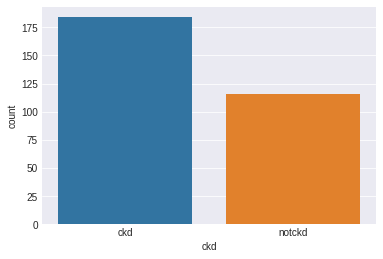

In [11]:
sns.countplot(x=y_train)

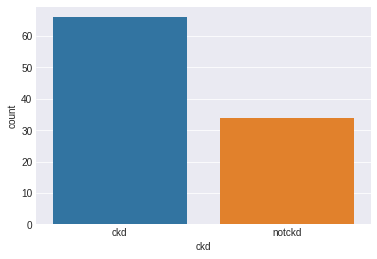

In [12]:
sns.countplot(x=y_test)

# Chapter 4: Preprocessing

## 4.1 Encoding

In [13]:
def EncodingTrain(Xtrain, ytrain):
    strtime = time.time()
    ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
    label_enc = LabelEncoder()
    categoricals = Xtrain.select_dtypes(include=object)
    numericals = Xtrain.select_dtypes(include=['int64','float64'])
    numericals.reset_index(drop=True, inplace=True)
    enc_categoricals = ordinal_enc.fit_transform(categoricals)
    enc_ytrain = label_enc.fit_transform(ytrain)
    enc_categoricals_df = pd.DataFrame(enc_categoricals, columns = list(categoricals.columns))
    enc_Xtrain = pd.concat([numericals, enc_categoricals_df], axis=1)

    execution_duration(strtime)
    return enc_Xtrain, enc_ytrain, ordinal_enc, label_enc

enc_Xtrain, enc_ytrain, ordinal_enc, label_enc = EncodingTrain(X_train, y_train)
enc_Xtrain.shape, enc_ytrain.shape

execution time: 0.012s


((300, 24), (300,))

In [14]:
def EncodingTest(ordinal_enc, label_enc, Xtest, ytest):
    strtime = time.time()
    categoricals = Xtest.select_dtypes(include=object)
    numericals = Xtest.select_dtypes(include=['int64','float64'])
    numericals.reset_index(drop=True, inplace=True)
    enc_categoricals = ordinal_enc.transform(categoricals)
    enc_ytest = label_enc.transform(ytest)
    enc_categoricals_df = pd.DataFrame(enc_categoricals, columns = list(categoricals.columns))
    enc_Xtest = pd.concat([numericals, enc_categoricals_df], axis=1)

    execution_duration(strtime)
    return enc_Xtest, enc_ytest
enc_Xtest, enc_ytest = EncodingTest(ordinal_enc, label_enc, X_test, y_test)
print(enc_Xtest.shape, enc_ytest.shape)

execution time: 0.008s
(100, 24) (100,)


## 4.2 Normalization

In [15]:
normalizer = MinMaxScaler()
X_train = normalizer.fit_transform(enc_Xtrain)
X_test = normalizer.transform(enc_Xtest)
X_train.shape, X_test.shape

((300, 24), (100, 24))

## 4.3 Imputation

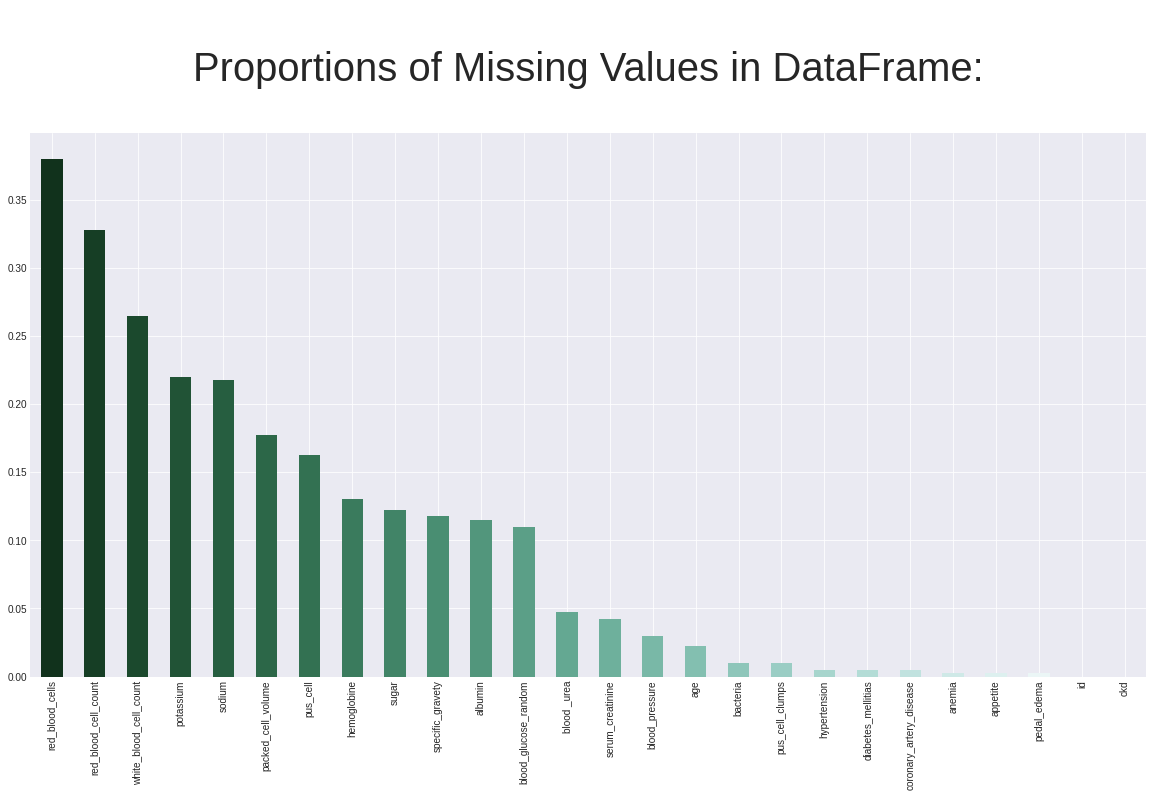

In [16]:
data = clean_df.copy()
d=((data.isnull().sum()/data.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values in DataFrame:\n",fontsize=40)
plt.show()

In [17]:
imputer = KNNImputer(n_neighbors = 5) #Declaring that 15 nearest neighbour should be decided
imputer.fit(X_train) #fitting imputer according to Training Features (X_train)

X_train = imputer.transform(X_train) #Appling Imputation
X_test = imputer.transform(X_test) #Appling Imputation
X_train.shape, X_test.shape

((300, 24), (100, 24))

## 4.4 Outlier Detection and removing

Outlier Detection and Removal from Training Dataset
(300, 24) (300,)
(262, 24) (262,)


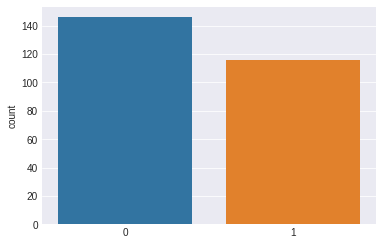

In [18]:
# summarize the shape of the training dataset
print("Outlier Detection and Removal from Training Dataset")
print(X_train.shape, enc_ytrain.shape)

# identify outliers in the training dataset
lof = LocalOutlierFactor(novelty=True)
lof.fit(X_train)
yhat = lof.predict(X_train)

# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], enc_ytrain[mask]

# summarize the shape of the updated testing dataset
print(X_train.shape, y_train.shape)
sns.countplot(x=y_train)

## 4.5 Over Sampling



(292, 24) (292,)


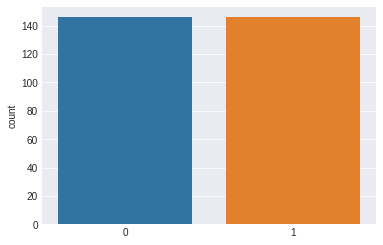

In [19]:
oversample = SMOTE()
Xtrain, ytrain = oversample.fit_resample(X_train, y_train)
print(Xtrain.shape, ytrain.shape)
sns.countplot(x=ytrain)

# Chapter 5: Validation

In [20]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
models = [SVC(), 
          GaussianNB(), 
          DecisionTreeClassifier(), 
          RandomForestClassifier(), 
          LogisticRegression(), 
          KNeighborsClassifier(), 
          GradientBoostingClassifier(), 
          AdaBoostClassifier(), 
          XGBClassifier()]
          
def Validate(models):
    for model in models:
        strtime = time.time()
        name = str(model)
        steps = list()
        steps.append((name, model))
        pipeline = Pipeline(steps=steps)
        # evaluate the model using cross-validation
        scores = cross_val_score(pipeline, Xtrain, ytrain, scoring='accuracy', cv=cv, n_jobs=-1)
        # report performance
        print(f"\nModel: {name}---------------")
        print('Accuracy: %.5f (%.5f)' % (mean(scores)*100, std(scores)*100))
        execution_duration(strtime)
        
Validate(models)


Model: SVC()---------------
Accuracy: 97.84368 (2.29909)
execution time: 1.369s

Model: GaussianNB()---------------
Accuracy: 97.94713 (2.36033)
execution time: 0.177s

Model: DecisionTreeClassifier()---------------
Accuracy: 99.65747 (1.02769)
execution time: 0.21s

Model: RandomForestClassifier()---------------
Accuracy: 99.65632 (1.03109)
execution time: 14.199s

Model: LogisticRegression()---------------
Accuracy: 97.32874 (2.58399)
execution time: 0.777s

Model: KNeighborsClassifier()---------------
Accuracy: 98.28736 (2.13722)
execution time: 0.256s

Model: GradientBoostingClassifier()---------------
Accuracy: 99.65747 (1.02769)
execution time: 6.241s

Model: AdaBoostClassifier()---------------
Accuracy: 99.62529 (1.06601)
execution time: 6.854s

Model: XGBClassifier()---------------
Accuracy: 100.00000 (0.00000)
execution time: 2.932s


# Chapter 6: Hyerparameter Optimization

In [21]:
SVM  =  SVC()
GNB  =  GaussianNB()
DT   =  DecisionTreeClassifier()
RF   =  RandomForestClassifier() 
LR   =  LogisticRegression()
KNN  =  KNeighborsClassifier() 
GB   =  GradientBoostingClassifier()
AB   =  AdaBoostClassifier() 
XGB  =  XGBClassifier()

estimators_dict = {
    SVM:{
    'C':range(1,3), 
    'kernel':('rbf','linear','poly', 'sigmoid'), 
    'degree':range(1,7), 
    'gamma': ('scale','auto'),
    'decision_function_shape': ('ovo', 'ovr')
    },

    LR:{
    'C':range(1,3), 
    'penalty':('l1','l2', 'None'), 
    'solver': ('lbfgs','liblinear', 'newton-cg', 'newton-cholesky')
    },

    KNN:{
    'n_neighbors' : [5,7,9,11,13,15,17,19],
    'weights': ('uniform', 'distance'),
    'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
    'p': [1,2]
    },
            
    DT:{
    'criterion': ('gini', 'entropy', 'log_loss'),
    'splitter' : ('best', 'random'),
    'max_features' : ('auto', 'sqrt', 'log2', 'none')
    },
        
    RF:{
    'n_estimators': range(50, 201, 50),
    'criterion': ('gini', 'entropy', 'log_loss'),
    'max_features' : ('auto', 'sqrt', 'log2', 'none')
    },
    
    GB:{
    'learning_rate': np.arange(0.01,0.15, 0.02),
    'n_estimators': range(50,201,50),
    'criterion': ('friedman_mse', 'squared_error'),
    'max_features': ('auto', 'sqrt', 'log2')
    },

    AB:{
    'learning_rate': np.arange(0.01,0.15, 0.02),
    'n_estimators': range(50,201,50),
    'algorithm': ('SAMME', 'SAMME.R')
    },

    XGB:{
    'learning_rate': np.arange(0.01,0.15, 0.02),
    'n_estimators': range(50,201,50),
    'booster': ('gbtree','dart')
    }
}

def Optimization(estimators_dict: dict, Xtrain, ytrain):
    optimized_models = []
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=6)
    for estimator,param_grid in estimators_dict.items():
        print(estimator)
        strtime = time.time()
        clf = GridSearchCV(estimator = estimator, 
                        param_grid = param_grid, 
                        cv=rskf, 
                        n_jobs=5,
                        verbose=1,
                        scoring = 'accuracy', 
                        return_train_score=True).fit(Xtrain, ytrain)

        print(clf.best_score_, clf.best_estimator_)
        execution_duration(strtime)
        print()
        optimized_models.append(clf.best_estimator_)
    return optimized_models

optimized_estimators = Optimization(estimators_dict, Xtrain, ytrain)

SVC()
Fitting 25 folds for each of 192 candidates, totalling 4800 fits
0.9904617182933956 SVC(C=1, decision_function_shape='ovo', degree=5, kernel='poly')
execution time: 19.609s

LogisticRegression()
Fitting 25 folds for each of 24 candidates, totalling 600 fits
0.9767971946230274 LogisticRegression(C=2, penalty='l1', solver='liblinear')
execution time: 1.407s

KNeighborsClassifier()
Fitting 25 folds for each of 128 candidates, totalling 3200 fits
0.9836703682057276 KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')
execution time: 24.472s

DecisionTreeClassifier()
Fitting 25 folds for each of 24 candidates, totalling 600 fits
0.9883927527761542 DecisionTreeClassifier(criterion='entropy', max_features='sqrt')
execution time: 0.885s

RandomForestClassifier()
Fitting 25 folds for each of 48 candidates, totalling 1200 fits
0.9972881355932204 RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=50)
execution time: 128.644s

Gradien

# Chapter 7: Testing and Evaluattion

In [22]:
for estimator in optimized_estimators:
    print(estimator.__class__.__name__, estimator)

SVC SVC(C=1, decision_function_shape='ovo', degree=5, kernel='poly')
LogisticRegression LogisticRegression(C=2, penalty='l1', solver='liblinear')
KNeighborsClassifier KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')
DecisionTreeClassifier DecisionTreeClassifier(criterion='entropy', max_features='sqrt')
RandomForestClassifier RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=50)
GradientBoostingClassifier GradientBoostingClassifier(learning_rate=0.01, max_features='log2')
AdaBoostClassifier AdaBoostClassifier(learning_rate=0.10999999999999997)
XGBClassifier XGBClassifier(learning_rate=0.01, n_estimators=150)


SVC(C=1, decision_function_shape='ovo', degree=5, kernel='poly')
execution time: 0.016s
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        66
           1       0.92      1.00      0.96        34

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



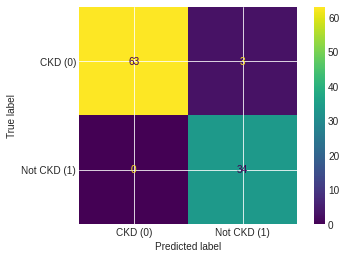


LogisticRegression(C=2, penalty='l1', solver='liblinear')
execution time: 0.017s
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        66
           1       0.92      1.00      0.96        34

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



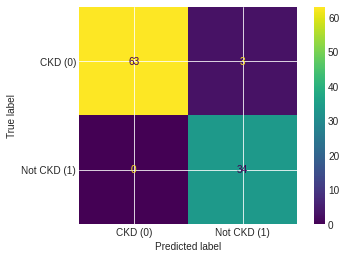


KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')
execution time: 0.01s
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        66
           1       0.87      1.00      0.93        34

    accuracy                           0.95       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.96      0.95      0.95       100



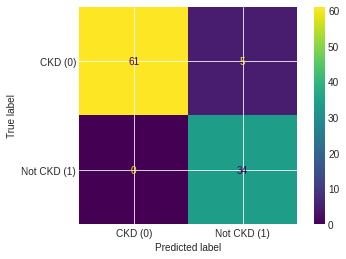


DecisionTreeClassifier(criterion='entropy', max_features='sqrt')
execution time: 0.01s
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       0.97      1.00      0.99        34

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



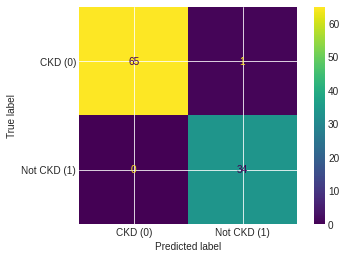


RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=50)
execution time: 0.112s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        34

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



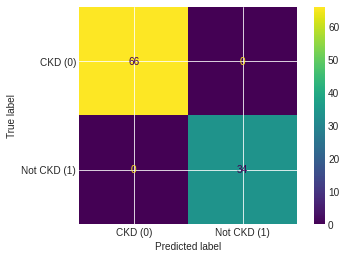


GradientBoostingClassifier(learning_rate=0.01, max_features='log2')
execution time: 0.087s
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.94      1.00      0.97        34

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



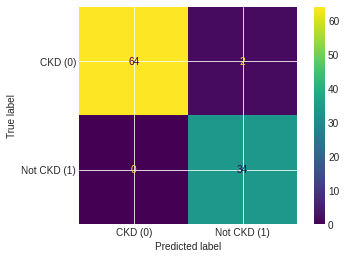


AdaBoostClassifier(learning_rate=0.10999999999999997)
execution time: 0.133s
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.94      1.00      0.97        34

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



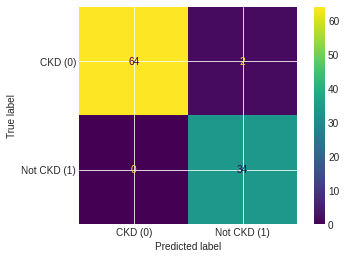


XGBClassifier(learning_rate=0.01, n_estimators=150)
execution time: 0.07s
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.94      1.00      0.97        34

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



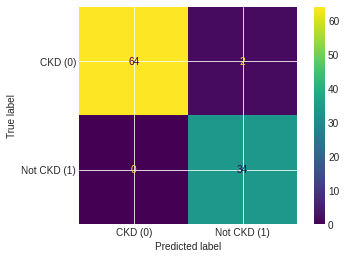

In [23]:
def Evaluation(estimator, Xtrain, ytrain, X_test, y_test):
    strtime=time.time()
    print(estimator)
    estimator.fit(Xtrain, ytrain)
    pred = estimator.predict(X_test)
    score = accuracy_score(y_test,pred)
    # print(int(score*100))
    report = classification_report(y_test,pred)
    cm = confusion_matrix(y_test, pred, labels=estimator.classes_)
    filename = str(X_test.shape[1])+"_"+str(estimator.__class__.__name__)+"_"+str(int(score*100))
    dump(estimator, filename)
    execution_duration(strtime)
    print(report)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= ['CKD (0)', 'Not CKD (1)'])
    disp.plot()
    plt.show()

for estimator in optimized_estimators:
    Evaluation(estimator, Xtrain, ytrain, X_test, enc_ytest)
    print()

In [24]:
notebook_endtime = execution_duration(notebook_strtime)

execution time: 847.538s
